# **Design of a Machine Learning-Based Anomaly Detection for Medical Prescription Data**

3. Machine Learning Models & Class Balancing

#Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Split
from sklearn.model_selection import train_test_split

#Sampling
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 

#Pipeline
from imblearn.pipeline import Pipeline

#Modeling
from sklearn import ensemble 
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix

#Pickle
import joblib

#Ignore
import warnings
warnings.filterwarnings('ignore')

#Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_before_sampling = joblib.load("/content/drive/MyDrive/data_preparation.pkl") #to open
df_before_sampling.head(30)

,provider_type,brand_name,num_claims,agg_daysupply,cost,num_beneficiaries,fraud
0,68,82,22,780,92.81,12.0,0
1,68,126,41,1482,373.60,22.0,0
2,68,147,15,77,132.57,15.0,0
3,68,258,21,787,118.53,11.0,0
4,68,266,13,81,203.03,13.0,0
5,68,335,26,930,172.04,11.0,0
6,68,466,13,91,209.66,13.0,0
7,68,803,17,750,187.20,11.0,0
8,68,903,22,900,146.50,14.0,0
9,68,992,23,1095,151.20,15.0,0


#Independent and Dependent Features

In [ ]:
#Independent and Dependent Features
X=df_before_sampling.drop("fraud",axis=1)
y=df_before_sampling.fraud

In [ ]:
y.value_counts()

0    10696346
1        3158
Name: fraud, dtype: int64

#Splitting the Data


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7) 

In [ ]:
y_train.value_counts()

0    7487469
1       2183
Name: fraud, dtype: int64

In [ ]:
# checking the shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7489652, 6), (3209852, 6), (7489652,), (3209852,))

#For Evaluation

In [ ]:
x_test_y_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
x_test_y_test.reset_index()
x_test_y_test.head()

,provider_type,brand_name,num_claims,agg_daysupply,cost,num_beneficiaries,fraud
8861966,68,548,34,2459,762.29,13.0,0
3290628,10,1260,49,3390,1283.54,17.0,0
5882804,68,1199,41,1590,349.65,11.0,0
529485,94,466,18,166,340.18,17.0,0
7541466,94,92,36,354,447.49,33.0,0


In [ ]:
df_eval_real_fraud = x_test_y_test.loc[x_test_y_test['fraud'] == 1].head(30)
df_eval_not_fraud = x_test_y_test.head(30)
#df_eval_real_fraud.to_csv("eval_fraud.csv")
#df_eval_not_fraud.to_csv("eval_not_fraud.csv")

In [ ]:
df_eval_real_fraud.drop("fraud", axis=1, inplace=True)

In [ ]:
df_eval_not_fraud.drop("fraud", axis=1, inplace=True)

#Resampling


In [ ]:
#over = RandomOverSampler(sampling_strategy=0.1)
over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=0.5)
under = RandomUnderSampler()
rus = RandomUnderSampler()


steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset SMOTE/RUS
X_smote_RUS, y_smote_RUS = pipeline.fit_resample(X_train, y_train)

# transform the dataset RUS
X_rus, y_rus = rus.fit_resample(X_train, y_train)
#X_rus_5, y_rus_5 = rus_5.fit_resample(X_train, y_train)

In [ ]:
y_smote_RUS.value_counts()

0    748746
1    748746
Name: fraud, dtype: int64

In [ ]:
y_train.value_counts()

0    7487469
1       2183
Name: fraud, dtype: int64

In [ ]:
X_rus.value_counts()
y_rus.value_counts()

0    2183
1    2183
Name: fraud, dtype: int64

In [ ]:
y_smote_RUS.value_counts()

0    748746
1    748746
Name: fraud, dtype: int64

#Models with No Sampling

In [ ]:
models = [LogisticRegression(), 
          RandomForestClassifier(),
          GradientBoostingClassifier()]

for m in models:
    model = m # select the model
    print("%s:" %  model.__class__.__name__)
    model.fit(X_train, y_train) # train the model
    y_pred = model.predict(X_test) # predict the test data
    y_score  = model.predict_proba(X_test)[:, 1] # probability of predicting correct y

    print("\tPrecision: %1.5f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.5f" % recall_score(y_test, y_pred))
    print("\tF1: %1.5f" % f1_score(y_test, y_pred))
    print("\tAuc: %1.5f" % roc_auc_score(y_test, y_score))
    print("\tAccuracy: %1.5f\n" % accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1]) ## Compute False postive rate, and True positive rate
    auc = metrics.roc_auc_score(y_test, y_score) # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (model.__class__.__name__, auc)) #plot the computed values

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate)')
plt.ylabel('True Positive Rate)')
plt.title('Comparison Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')

for m, ax in zip(models, axes.flatten()):
    plot_confusion_matrix(m, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['0', '1'],
                          values_format='d')
    ax.title.set_text(type(m).__name__)
plt.tight_layout()  
plt.show()

#Models with RUS

LogisticRegression:
	Precision: 0.00043
	Recall: 0.45083
	F1: 0.00085
	Auc: 0.62443
	Accuracy: 0.70131

              precision    recall  f1-score   support

           0       1.00      0.70      0.82   3208947
           1       0.00      0.45      0.00       905

    accuracy                           0.70   3209852
   macro avg       0.50      0.58      0.41   3209852
weighted avg       1.00      0.70      0.82   3209852

RandomForestClassifier:
	Precision: 0.00058
	Recall: 0.69613
	F1: 0.00116
	Auc: 0.74075
	Accuracy: 0.66281

              precision    recall  f1-score   support

           0       1.00      0.66      0.80   3208947
           1       0.00      0.70      0.00       905

    accuracy                           0.66   3209852
   macro avg       0.50      0.68      0.40   3209852
weighted avg       1.00      0.66      0.80   3209852

GradientBoostingClassifier:
	Precision: 0.00058
	Recall: 0.71050
	F1: 0.00115
	Auc: 0.73985
	Accuracy: 0.65280

              precisio

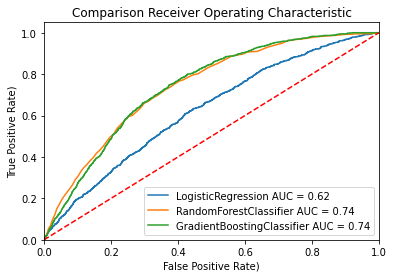

In [ ]:
models = [LogisticRegression(), 
          RandomForestClassifier(),
          GradientBoostingClassifier()]

for m in models:
    model = m # select the model
    print("%s:" %  model.__class__.__name__)
    model.fit(X_rus, y_rus) # train the model
    y_pred = model.predict(X_test) # predict the test data
    y_score  = model.predict_proba(X_test)[:, 1] # probability of predicting correct y

    print("\tPrecision: %1.5f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.5f" % recall_score(y_test, y_pred))
    print("\tF1: %1.5f" % f1_score(y_test, y_pred))
    print("\tAuc: %1.5f" % roc_auc_score(y_test, y_score))
    print("\tAccuracy: %1.5f\n" % accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1]) ## Compute False postive rate, and True positive rate
    auc = metrics.roc_auc_score(y_test, y_score) # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (model.__class__.__name__, auc)) #plot the computed values

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate)')
plt.ylabel('True Positive Rate)')
plt.title('Comparison Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 

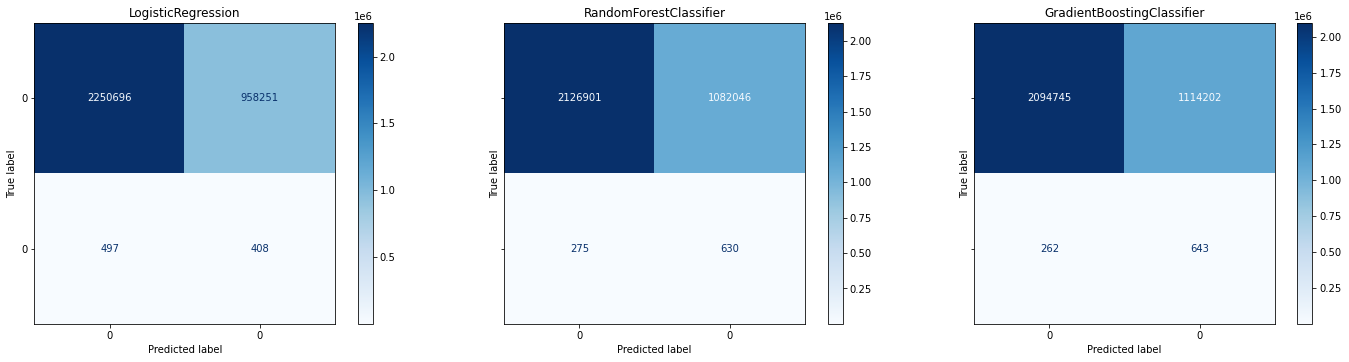

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')

for m, ax in zip(models, axes.flatten()):
    plot_confusion_matrix(m, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['0', '1'],
                          values_format='d')
    ax.title.set_text(type(m).__name__)
plt.tight_layout()  
plt.show()

#Models with hybrid SMOTE-RUS 

LogisticRegression:
	Precision: 0.00046
	Recall: 0.42581
	F1: 0.00092
	Auc: 0.61828
	Accuracy: 0.71779

              precision    recall  f1-score   support

           0       1.00      0.72      0.84   3208868
           1       0.00      0.43      0.00       984

    accuracy                           0.72   3209852
   macro avg       0.50      0.57      0.42   3209852
weighted avg       1.00      0.72      0.84   3209852

RandomForestClassifier:
	Precision: 0.00146
	Recall: 0.03049
	F1: 0.00279
	Auc: 0.64367
	Accuracy: 0.99333

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   3208868
           1       0.00      0.03      0.00       984

    accuracy                           0.99   3209852
   macro avg       0.50      0.51      0.50   3209852
weighted avg       1.00      0.99      1.00   3209852

GradientBoostingClassifier:
	Precision: 0.00064
	Recall: 0.22154
	F1: 0.00128
	Auc: 0.65805
	Accuracy: 0.89420

              precisio

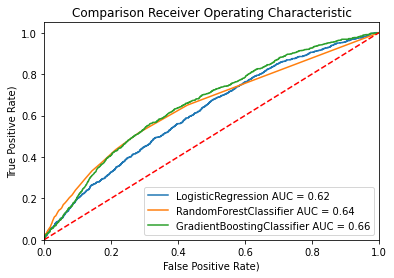

In [ ]:
models = [#LogisticRegression(), 
          #RandomForestClassifier(),
          GradientBoostingClassifier(learning_rate= 0.01, max_depth= 8, n_estimators=300)

for m in models:
    model = m # select the model
    print("%s:" %  model.__class__.__name__)
    model.fit(X_smote_RUS, y_smote_RUS) # train the model
    y_pred = model.predict(X_test) # predict the test data
    y_score  = model.predict_proba(X_test)[:, 1] # probability of predicting correct y

    print("\tPrecision: %1.5f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.5f" % recall_score(y_test, y_pred))
    print("\tF1: %1.5f" % f1_score(y_test, y_pred))
    print("\tAuc: %1.5f" % roc_auc_score(y_test, y_score))
    print("\tAccuracy: %1.5f\n" % accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1]) ## Compute False postive rate, and True positive rate
    auc = roc_auc_score(y_test, y_score) # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (model.__class__.__name__, auc)) #plot the computed values

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate)')
plt.ylabel('True Positive Rate)')
plt.title('Comparison Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 

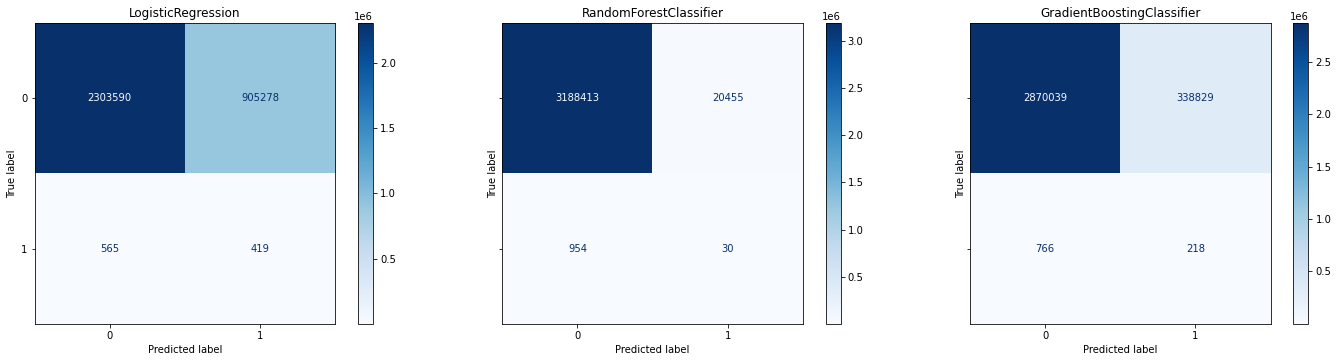

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')

for m, ax in zip(models, axes.flatten()):
    plot_confusion_matrix(m, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['0', '1'],
                          values_format='d')
    ax.title.set_text(type(m).__name__)
plt.tight_layout()  
plt.show()

#GridSearch Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define Parameters
max_depth=[3, 5, 10]
n_estimators = [100,200,300]
max_features = [3,5,10,20]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, max_features=max_features)

# Build the grid search
dfrst = RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators, max_features=max_features)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, scoring = 'roc_auc', cv = 5)
grid_results = grid.fit(X_rus, y_rus)
best_auc = grid_results.best_score_

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
print("Best: {:.2f} %".format(best_auc.mean()*100))

Best: [0.67727757 0.67901713 0.67937019 0.67985187 0.68156227 0.68117382
        nan        nan        nan        nan        nan        nan
 0.73446084 0.73616693 0.73445266 0.74217435 0.74093181 0.74235682
        nan        nan        nan        nan        nan        nan
 0.74104575 0.74262562 0.74271062 0.74163709 0.74133665 0.74449918
        nan        nan        nan        nan        nan        nan], using {'max_depth': 16, 'max_features': 5, 'n_estimators': 300}
Best: 74.45 %


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define Parameters

n_estimators = [5,50,250,500]
max_depth=[1,3,5,7,9]


param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)

# Build the grid search
dfrst = GradientBoostingClassifier(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, scoring = 'roc_auc', cv = 5)
grid_results = grid.fit(X_rus, y_rus)
best_auc = grid_results.best_score_

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
print("Best: {:.2f} %".format(best_auc.mean()*100))


Best: [0.67209062 0.68471097 0.69346759 0.73783115 0.74638327 0.74752982
 0.66456937 0.67649208 0.6839086  0.72092027 0.73331481 0.74121237
 0.7468598  0.74461575 0.74006536 0.70736659 0.71974767 0.72214329
 0.72483025 0.72424492 0.72483961 0.70703138 0.72348479 0.72064302
 0.7134286  0.71586507 0.71028523 0.55475483 0.55475483 0.55475483
 0.50805522 0.51994927 0.49328563 0.62135974 0.58881066 0.59296562
 0.41783136 0.41783136 0.41783136 0.45383284 0.48822247 0.46357109
 0.55177516 0.54558075 0.57697373], using {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 300}
Best: 74.75 %


In [ ]:
#logreg = LogisticRegression()
#from sklearn.model_selection import cross_val_score
#results = cross_val_score(logreg, X_rus, y_rus, scoring='roc_auc',cv=10)
#print(results)
#print(np.mean(results))

[0.61605723 0.63140516 0.59517618 0.62291927 0.62412727 0.62353351
 0.63700579 0.63192809 0.63141623 0.59759219]
0.6211160926492307


#Create Fraction of Test Dataset

In [ ]:
models = [#LogisticRegression(), 
          #RandomForestClassifier(),
          GradientBoostingClassifier(learning_rate= 0.01, max_depth= 8, n_estimators=300)]

for m in models:
    model = m # select the model
    print("%s:" %  model.__class__.__name__)
    model.fit(X_rus, y_rus) # train the model
    y_pred_eval_not_fraud = model.predict(df_eval_not_fraud) # predict the test data
    y_pred_eval_fraud = model.predict(df_eval_real_fraud)
    #y_score  = model.predict_proba(df_eval_real_fraud)[:, 1] # probability of predicting correct y

    #print("\tPrecision: %1.5f" % precision_score(y_test, y_pred))
    #print("\tRecall: %1.5f" % recall_score(y_test, y_pred))
    #print("\tF1: %1.5f" % f1_score(y_test, y_pred))
    #print("\tAuc: %1.5f" % roc_auc_score(y_test, y_score))
    #print("\tAccuracy: %1.5f\n" % accuracy_score(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    #joblib.dump(model, open("rfc_model.pkl",'wb'))
    #joblib.dump(model, "rfc_model.pkl")

GradientBoostingClassifier:


In [ ]:
y_pred_eval_not_fraud

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
y_pred_eval_fraud

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
df_eval_real_fraud['predition'] = y_pred_eval_fraud
df_eval_not_fraud['prediction'] = y_pred_eval_not_fraud

In [ ]:
df_eval_not_fraud

,provider_type,brand_name,num_claims,agg_daysupply,cost,num_beneficiaries,prediction
8861966,68,548,34,2459,762.29,13.0,1
3290628,10,1260,49,3390,1283.54,17.0,0
5882804,68,1199,41,1590,349.65,11.0,1
529485,94,466,18,166,340.18,17.0,0
7541466,94,92,36,354,447.49,33.0,0
9219833,46,123,67,4830,662.50,17.0,0
2237771,12,903,48,3840,360.15,19.0,0
3633095,46,126,205,8860,2527.77,33.0,0
702291,68,456,59,2790,1043.77,14.0,1
7697610,139,734,194,5758,4676.75,28.0,0


In [ ]:
df_eval_real_fraud

,provider_type,brand_name,num_claims,agg_daysupply,cost,num_beneficiaries,predition
10529055,46,1442,165,13665,1502.92,60.0,0
7427963,46,639,46,2370,217.79,23.0,1
8364007,49,246,132,3551,9500.09,13.0,1
4102660,68,1765,203,6810,1985.42,44.0,1
5622915,68,476,41,2200,1537.50,13.0,1
1671336,126,1590,90,2820,807.33,16.0,1
9929442,94,92,15,104,149.14,11.0,0
1771157,139,979,177,7996,7169.66,36.0,1
4102674,68,1006,35,1650,880.92,13.0,1
2004351,68,505,71,2476,38572.36,14.0,1


# Comparison to RFC from Literature

In [ ]:
models = [#LogisticRegression(), 
          literature = RandomForestClassifier(),
          this_study = RandomForestClassifier(),
          

for m in models:
    model = m # select the model
    print("%s:" %  model.__class__.__name__)
    model.fit(X_rus, y_rus) # train the model
    y_pred = model.predict(X_test) # predict the test data
    
    y_score  = model.predict_proba(X_test)[:, 1] # probability of predicting correct y
    
    print("\tConfusion Matrix Best: %1.5f" % confusion_matrix(y_test, y_pred))

    print("\tPrecision: %1.5f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.5f" % recall_score(y_test, y_pred))
    print("\tF1: %1.5f" % f1_score(y_test, y_pred))
    print("\tAuc: %1.5f" % roc_auc_score(y_test, y_score))
    print("\tAccuracy: %1.5f\n" % accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    joblib.dump(model, open("rfc_model.pkl",'wb'))
    joblib.dump(model, "rfc_model.pkl")

#Save best performing model

In [ ]:
#joblib.dump(model, "rfc_model.pkl")